# **Pandemic Impact: COVID-19 and World Happiness**

---



***Submitted by:***

> **SHIMIL SHIJO**  
**23MSP3025**

 > **HRIDYA  A**      
**23MSP3083**

## **AIM**

Investigating the relation Between Country-Specific COVID-19 Rates and World Happiness Index Scores to Understand the Impact of the Pandemic on Societal Well-being.


### **DATASET DESCRIPTION**

This project combines two datasets: the COVID-19 dataset from the WHO website and the World Happiness Report dataset from Kaggle. The former provides COVID-19 rates for countries, while the latter offers happiness scores.

[COVID-19 Dataset](https://covid19.who.int/data)                             
[World Happiness Report Dataset](https://www.kaggle.com/datasets/unsdsn/world-happiness)

In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Reading COVID-19 dataset
covid_data = pd.read_csv('covid_dataset.csv')
covid_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


## **DATA PRE-PROCESSING**

## **A. Pre-processing COVID-19 Dataset**

In [ ]:
#checking dataframe shape
covid_data.shape

(266, 104)

In [ ]:
#Checking column names
columns = covid_data.columns
columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '4/21/20', '4/22/20', '4/23/20', '4/24/20', '4/25/20', '4/26/20',
       '4/27/20', '4/28/20', '4/29/20', '4/30/20'],
      dtype='object', length=104)

**1. Checking Missing Values**

In [ ]:
covid_data.isna().sum()

Province/State    184
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
4/26/20             0
4/27/20             0
4/28/20             0
4/29/20             0
4/30/20             0
Length: 104, dtype: int64

**Interpretation :** There is no missing values in the dataset.

**2. Checking Duplicate Rows**

In [ ]:
covid_data.duplicated().any()

False

**Interpretation :** Dataset does not have duplicate rows

**3. Remove not required columns**

In [ ]:
#Remove not required columns
#Latitude and Longitude colums are irrelevent for the context.Hence this can be removed.
covid_data.drop(['Lat','Long'],axis = 1, inplace=True)
print(covid_data.columns)

Index(['Province/State', 'Country/Region', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       ...
       '4/21/20', '4/22/20', '4/23/20', '4/24/20', '4/25/20', '4/26/20',
       '4/27/20', '4/28/20', '4/29/20', '4/30/20'],
      dtype='object', length=102)


**4. Grouping the records based on country name**

In [ ]:
covid_data_grouped = covid_data.groupby('Country/Region').sum()
covid_data_grouped.head()

<ipython-input-25-efa62008396f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  covid_data_grouped = covid_data.groupby('Country/Region').sum()


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [ ]:
#Checking shape of grouped dataframe
covid_data_grouped.shape

(187, 100)

**5. Find total infections in all countries**

In [ ]:
countries = list(covid_data_grouped.index)
infection_count = []

for c in countries:
    infection_count.append(covid_data_grouped.loc[c].sum())

infection_count



[28462,
 17864,
 74325,
 21893,
 649,
 678,
 84105,
 40610,
 224354,
 502063,
 37281,
 1677,
 56608,
 70829,
 2326,
 150475,
 1082648,
 429,
 1246,
 213,
 15387,
 36234,
 444,
 1085638,
 5777,
 29366,
 17131,
 2463,
 185,
 1472,
 4842,
 31564,
 982149,
 485,
 832,
 282177,
 6686938,
 107654,
 1,
 3516,
 9281,
 20853,
 21985,
 56068,
 26458,
 21935,
 209985,
 236274,
 53404,
 16408,
 539,
 122072,
 337630,
 90542,
 5489,
 2997,
 1092,
 48428,
 918,
 2761,
 511,
 112892,
 4132964,
 3192,
 268,
 11027,
 4531683,
 25175,
 77726,
 481,
 7645,
 16059,
 1541,
 1703,
 1461,
 305,
 14128,
 52370,
 61442,
 457945,
 176940,
 2783401,
 48863,
 389169,
 393611,
 6139613,
 5393,
 282573,
 14237,
 48155,
 7633,
 572513,
 11608,
 55693,
 13847,
 553,
 23426,
 24136,
 2097,
 1213,
 3065,
 37109,
 116527,
 278,
 3414,
 528,
 173243,
 2808,
 6004,
 12806,
 250,
 9755,
 237643,
 65045,
 3040,
 934,
 8890,
 75625,
 1118,
 569,
 884,
 949574,
 42498,
 302,
 15202,
 20351,
 31559,
 251779,
 33924,
 245996,
 

**5. Adding new columns of highest and lowest infection rates for all countries**

In [ ]:
covid_data_grouped["Total Infections"] = infection_count
covid_data_grouped.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Total Infections
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,28462
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,17864
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,74325
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,21893
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,649


**6. Creating new dataframe with only required fields**

In [ ]:
country_covid_rate_df = pd.DataFrame(covid_data_grouped["Total Infections"])
country_covid_rate_df.head()

,Total Infections
Country/Region,
Afghanistan,28462
Albania,17864
Algeria,74325
Andorra,21893
Angola,649


## **B. Pre-processing World Happiness Index Dataset**

### **Importing happiness index dataset**

In [ ]:
happiness_index_data = pd.read_csv("happiness_index.csv")
happiness_index_data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


**1. Checking Missing Values**

In [ ]:
happiness_index_data.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

**Interpretation :** There is no missing values in the dataset.

**2. Checking Duplicate Rows**

In [ ]:
happiness_index_data.duplicated().any()

False

**Interpretation :** There is no duplicate rows in the dataset.

**3. Removing not required Columns**

In [ ]:
remove_columns = ["Overall rank","Score","Generosity"]
happiness_index_data.drop(remove_columns, axis=1, inplace=True)
happiness_index_data.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
0,Finland,1.340,1.587,0.986,0.596,0.393
1,Denmark,1.383,1.573,0.996,0.592,0.410
2,Norway,1.488,1.582,1.028,0.603,0.341
3,Iceland,1.380,1.624,1.026,0.591,0.118
4,Netherlands,1.396,1.522,0.999,0.557,0.298


**4. Changing dataframe index to country name**

In [ ]:
happiness_index_data.set_index("Country or region", inplace=True)
happiness_index_data.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
Country or region,,,,,
Finland,1.340,1.587,0.986,0.596,0.393
Denmark,1.383,1.573,0.996,0.592,0.410
Norway,1.488,1.582,1.028,0.603,0.341
Iceland,1.380,1.624,1.026,0.591,0.118
Netherlands,1.396,1.522,0.999,0.557,0.298


## **C. Joining Covid Dataset and Happiness Index Dataset**

In [ ]:
#COVID Dataset
country_covid_rate_df.head()

,Total Infections
Country/Region,
Afghanistan,28462
Albania,17864
Algeria,74325
Andorra,21893
Angola,649


In [ ]:
#Shape of COVID dataset
country_covid_rate_df.shape

(187, 1)

In [ ]:
#World Happiness index dataset
happiness_index_data.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
Country or region,,,,,
Finland,1.340,1.587,0.986,0.596,0.393
Denmark,1.383,1.573,0.996,0.592,0.410
Norway,1.488,1.582,1.028,0.603,0.341
Iceland,1.380,1.624,1.026,0.591,0.118
Netherlands,1.396,1.522,0.999,0.557,0.298


In [ ]:
#Shape of happiness index data
happiness_index_data.shape

(156, 5)

In [ ]:
#Perform inner join to include the details of countries which appears in both datasets
data = country_covid_rate_df.join(happiness_index_data,
                how = "inner"
                )
data.head()

,Total Infections,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
Afghanistan,28462,0.350,0.517,0.361,0.000,0.025
Albania,17864,0.947,0.848,0.874,0.383,0.027
Algeria,74325,1.002,1.160,0.785,0.086,0.114
Argentina,84105,1.092,1.432,0.881,0.471,0.050
Armenia,40610,0.850,1.055,0.815,0.283,0.064


## **EXPLORATORY DATA ANALYSIS**

## **1. Correlation matrix**

In [ ]:
data.corr()

,Total Infections,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
Total Infections,1.000000,0.280044,0.183900,0.316972,0.043221,0.108712
GDP per capita,0.280044,1.000000,0.759468,0.863062,0.394603,0.311577
Social support,0.183900,0.759468,1.000000,0.765286,0.456246,0.203225
Healthy life expectancy,0.316972,0.863062,0.765286,1.000000,0.427892,0.314811
Freedom to make life choices,0.043221,0.394603,0.456246,0.427892,1.000000,0.446677
Perceptions of corruption,0.108712,0.311577,0.203225,0.314811,0.446677,1.000000


## **2. Pair Plot : How infection rate is correlated with other variables**

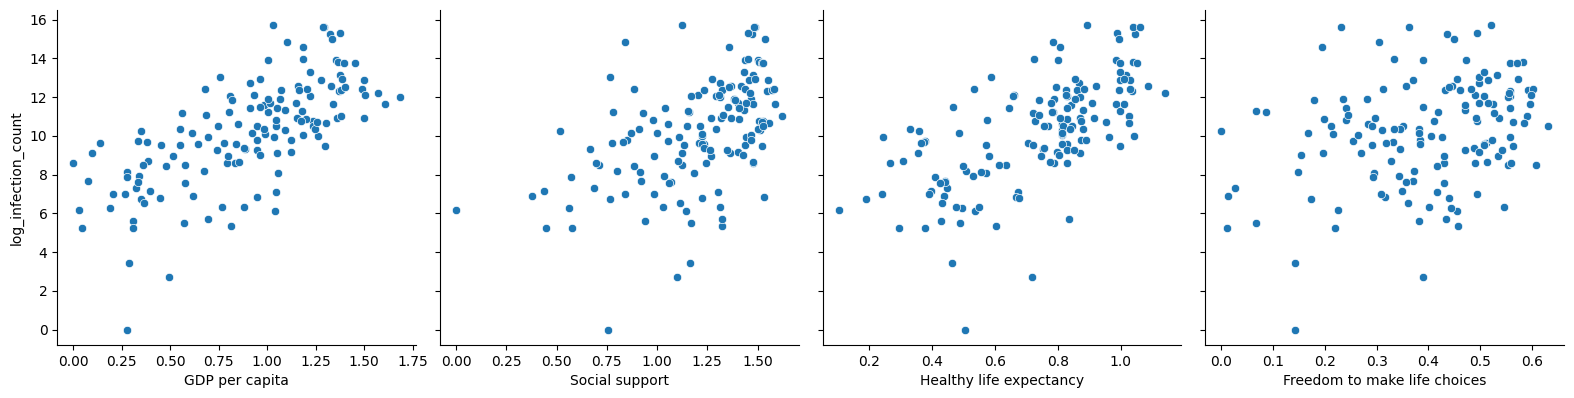

In [ ]:
#Pair Plot
data['log_infection_count'] = np.log(data['Total Infections'])
sns.pairplot(data, x_vars=['GDP per capita', 'Social support', 'Healthy life expectancy','Freedom to make life choices'], y_vars='log_infection_count', height=4, aspect=1, kind='scatter')
plt.show()

**Interpretation :** All the graphs are  weakly positively correlated with target variable.

## **3. Regression Plot**

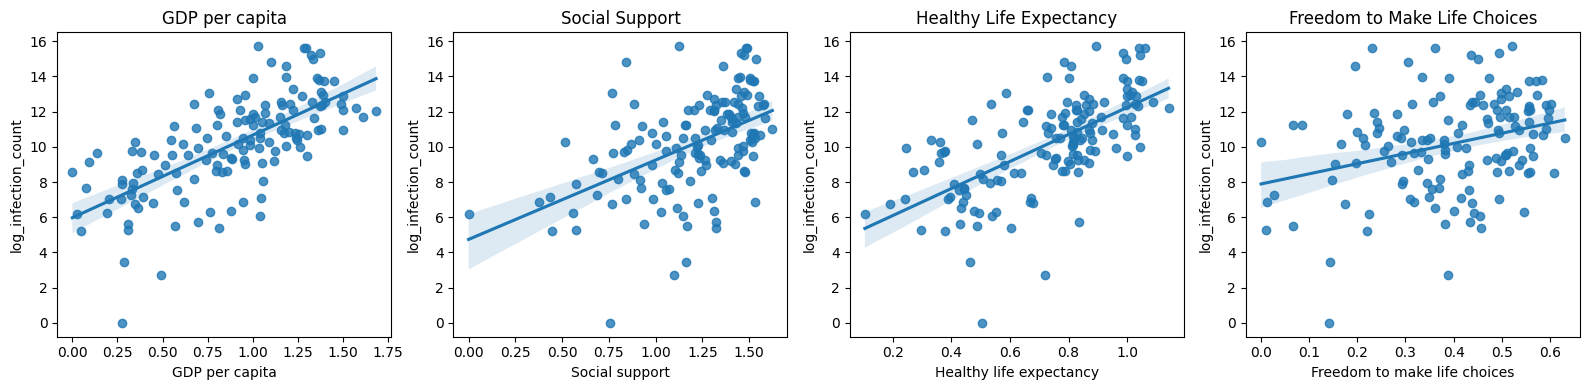

In [ ]:
#Regression Plot
# Set up a 1x4 grid of subplots
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Plot each regression plot on a separate subplot
sns.regplot(x='GDP per capita', y='log_infection_count', data=data, ax=axes[0])
axes[0].set_title('GDP per capita')

sns.regplot(x='Social support', y='log_infection_count', data=data, ax=axes[1])
axes[1].set_title('Social Support')

sns.regplot(x='Healthy life expectancy', y='log_infection_count', data=data, ax=axes[2])
axes[2].set_title('Healthy Life Expectancy')

sns.regplot(x='Freedom to make life choices', y='log_infection_count', data=data, ax=axes[3])
axes[3].set_title('Freedom to Make Life Choices')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


**Interpretation :** GDP per capita and Healthy life expectancy are weakly positively correlated with target variable.

## **4. Distribution of Target Variable**

<ipython-input-43-94ef63c433b6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['log_infection_count'])


<Axes: xlabel='log_infection_count', ylabel='Density'>

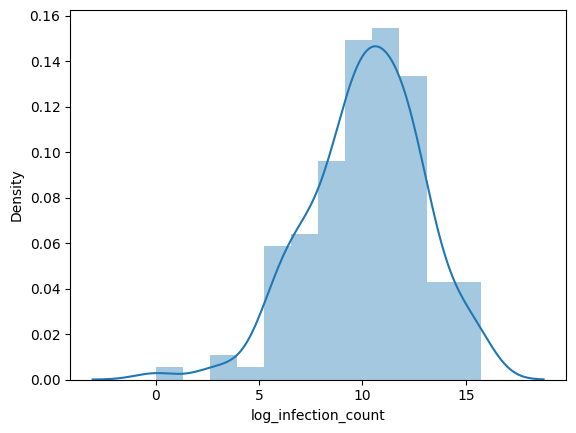

In [ ]:
# Distribution of the target variable
data['log_infection_count'] = np.log(data['Total Infections'])
sns.distplot(data['log_infection_count'])

**Interpretation :** Distribution is slightly left skewed

## **5. Checking Outliers**

<Axes: >

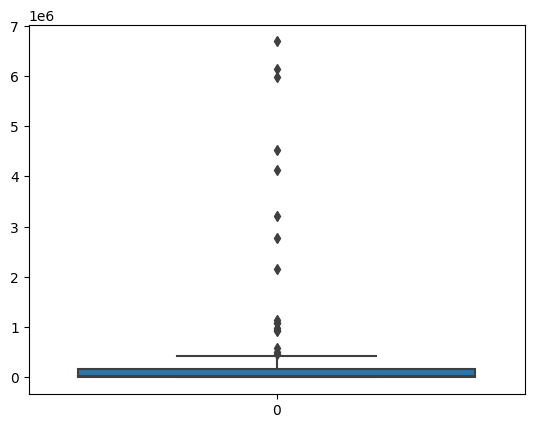

In [ ]:
# Checking Outliers
data.head()
sns.boxplot(data['Total Infections'])

**Interpretation :** There are many outliers present in the dataset

In [ ]:
#Dropping irrelevent column
remove_columns = ["log_infection_count"]
data.drop(remove_columns, axis=1, inplace=True)
data.head()

,Total Infections,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
Afghanistan,28462,0.350,0.517,0.361,0.000,0.025
Albania,17864,0.947,0.848,0.874,0.383,0.027
Algeria,74325,1.002,1.160,0.785,0.086,0.114
Argentina,84105,1.092,1.432,0.881,0.471,0.050
Armenia,40610,0.850,1.055,0.815,0.283,0.064


## **6. Heatmap**

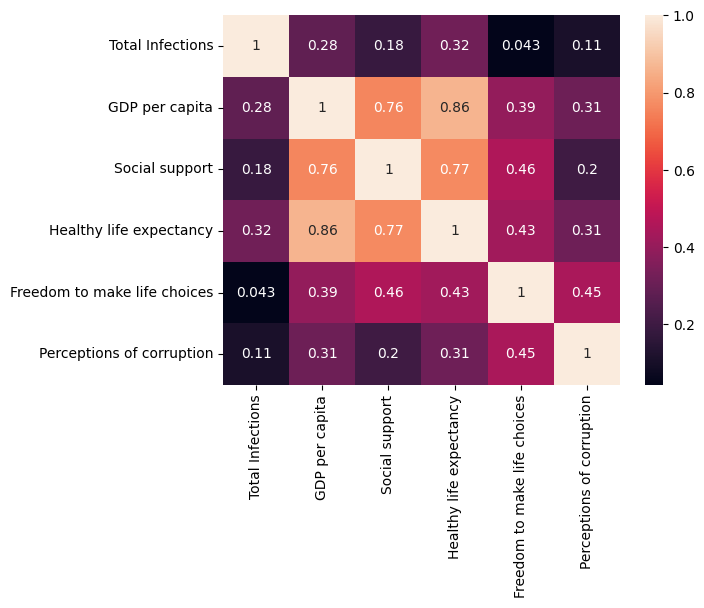

In [ ]:
#Heatmap
sns.heatmap(data.corr(), annot = True)
plt.show()

**Interpretation:** Healthy life expectancy seems to be most correlated(but weakly) with total infections compared to other independent variables.

# **STORING DATA IN DATABASE**

In [ ]:
import pandas as pd
import sqlite3

In [ ]:
#Adding csv data into dataframe
csv_file_path1 = 'covid_dataset.csv'
csv_file_path2 = 'happiness_index.csv'
df1 = pd.read_csv(csv_file_path1)
df2= pd.read_csv(csv_file_path2)

In [ ]:
#Database and table creation and data population
try:
  #create a database
  covid_db = 'covid_analysis.db'

  # Create a connection
  sqliteConnection = sqlite3.connect(covid_db)
  print("Connection Successful!!")

  # COnvert dataframe into table
  df1.to_sql('covid_table', sqliteConnection, index=False, if_exists='replace')
  df2.to_sql('happiness_table', sqliteConnection, index=False, if_exists='replace')
  print("Tables created")

except sqlite3.Error as error:
    print("Error while creating table",error)

finally:
    #finally block will be executed always
    if sqliteConnection:
        sqliteConnection.close()
        print("Connection is closed")



Connection Successful!!
Tables created
Connection is closed


In [ ]:
# READ covid TABLE
def readTable():
    try:
        sqliteConnection = sqlite3.connect(covid_db)
        cursor = sqliteConnection.cursor()
        print("Connection Successful!!")
        sqlite_create_table_query =  '''SELECT * FROM covid_table;'''
        cursor.execute(sqlite_create_table_query)
        records = cursor.fetchall()
        print("length of records:",len(records))
        print(records)
        cursor.close()
    except sqlite3.Error as error:
        print("Error while deleting",error)
    finally:
        #finally block will be executed always
        if sqliteConnection:
            sqliteConnection.close()
            print("Connection is closed")
readTable()

Connection Successful!!
length of records: 266
[(None, 'Afghanistan', 33.0, 65.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 5, 7, 7, 7, 11, 16, 21, 22, 22, 22, 24, 24, 40, 40, 74, 84, 94, 110, 110, 120, 170, 174, 237, 273, 281, 299, 349, 367, 423, 444, 484, 521, 555, 607, 665, 714, 784, 840, 906, 933, 996, 1026, 1092, 1176, 1279, 1351, 1463, 1531, 1703, 1828, 1939, 2171), (None, 'Albania', 41.1533, 20.1683, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 10, 12, 23, 33, 38, 42, 51, 55, 59, 64, 70, 76, 89, 104, 123, 146, 174, 186, 197, 212, 223, 243, 259, 277, 304, 333, 361, 377, 383, 400, 409, 416, 433, 446, 467, 475, 494, 518, 539, 548, 562, 584, 609, 634, 663, 678, 712, 726, 736, 750, 766, 773), (None, 'Algeria', 28.0339, 1.6596, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

# **BUILDING PREDICTIVE MODEL AND TESTING : MULTIPLE LINEAR REGRESSION**

In [ ]:
#Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## **Object Oriented Programming for Predictive Modelling**

In [ ]:
class LinearRegressionModel:
    def __init__(self, data):
        self.data = data
        self.x = data[['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices']]
        self.y = data['Total Infections']
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.x, self.y, test_size=0.2, random_state=100)
        self.mlr = LinearRegression()

    def train_model(self):
        self.mlr.fit(self.x_train, self.y_train)

    def print_coefficients(self):
        print("Intercept Value:", self.mlr.intercept_)
        # pair the feature names with the coefficients
        print("Other Coefficients:", list(zip(self.x.columns, self.mlr.coef_)))

    def predict_test_set(self):
        y_pred_mlr = self.mlr.predict(self.x_test)
        print("Prediction for test set:", y_pred_mlr)

    def print_actual_vs_predicted(self):
        mlr_diff = pd.DataFrame({'Actual value': self.y_test, 'Predicted value': self.mlr.predict(self.x_test)})
        print("\n----------------Actual vs Predicted Value---------------")
        print(mlr_diff)

    def predict_for_values(self, values):
        pred_vals = self.mlr.predict([values])
        print(f'R Predicted Value: {pred_vals}')

    def print_r_squared_value(self):
        r_squared = self.mlr.score(self.x, self.y) * 100
        print('R squared value of the model: {:.2f}'.format(r_squared))

    def print_error_metrics(self):
        y_pred_mlr = self.mlr.predict(self.x_test)
        mean_absolute_error = metrics.mean_absolute_error(self.y_test, y_pred_mlr)
        mean_squared_error = metrics.mean_squared_error(self.y_test, y_pred_mlr)
        root_mean_squared_error = np.sqrt(mean_squared_error)

        print('Mean Absolute Error:', mean_absolute_error)
        print('Mean Square Error:', mean_squared_error)
        print('Root Mean Square Error:', root_mean_squared_error)


linear_reg_model = LinearRegressionModel(data)
linear_reg_model.train_model()
linear_reg_model.print_coefficients()
linear_reg_model.predict_test_set()
linear_reg_model.print_actual_vs_predicted()
linear_reg_model.predict_for_values([0.9, 0.6, 0.55, 0.78])
linear_reg_model.print_r_squared_value()
linear_reg_model.print_error_metrics()

Intercept Value: -134524.67717574624
Other Coefficients: [('GDP per capita', 272329.25260819617), ('Social support', -732709.7723702246), ('Healthy life expectancy', 1724646.3974207772), ('Freedom to make life choices', -306889.91130496183)]
Prediction for test set: [ 516627.33696103  549742.57482286  627047.76705019  519714.3196811
 -280412.86639126  655140.23551356  382076.80776309  406788.21951885
  422413.86373857  688100.71152579  330893.86359747 -215106.22503947
  290206.00985003  731025.51202748  681229.93838944  -93601.014
  485980.81944443  809524.51378545  848613.27182111  314134.25214808
  539529.81085346  212800.30364683   79281.35781691   52911.35873529
  414019.42131276  496686.27698456  737916.99081618  576726.12682345
  699436.27084722]

----------------Actual vs Predicted Value---------------
                        Actual value  Predicted value
Poland                        251454    516627.336961
Kuwait                         55693    549742.574823
Bosnia and Herzeg

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## **Interpretation:**
* Intercept: The intercept represents the predicted value of the dependent variable when all predictor variables are zero. In your case, it's -134524.68.

* GDP per capita coefficient: A one-unit increase in GDP per capita is associated with an increase of approximately 272329.25 in the dependent variable.

* Social support coefficient: A one-unit increase in social support is associated with a decrease of approximately 732709.77 in the dependent variable.

* Healthy life expectancy coefficient: A one-unit increase in healthy life expectancy is associated with an increase of approximately 1724646.40 in the dependent variable.

* Freedom to make life choices coefficient: A one-unit increase in freedom to make life choices is associated with a decrease of approximately 306889.91 in the dependent variable.

* R Predicted Value: The predicted value of the dependent variable for the entire test set is 380127.17.

* R squared value: The R squared value of 11.24% indicates that approximately 11.24% of the variance in the dependent variable is explained by the independent variables in your model.

* Mean Absolute Error (MAE): The average absolute difference between the predicted and actual values is 610685.46.

* Mean Square Error (MSE): The average squared difference between the predicted and actual values is 1343126647727.97.

* Root Mean Square Error (RMSE): The square root of MSE is 1158933.41, representing the average magnitude of the errors in the predicted values.

# **CONCLUSION**

In summary, the study on how COVID-19 rates relate to World happiness index shows that the response variable is very slightly positively dependent on chosen predictor variables and hence the model doesn't explain much (low R squared at 11.24%). The model's predictions differ a lot from the actual values, suggesting it might not be the best fit for our data. This could be because:

    -Model not capturing genuine predictor relationships.                                               
    -Predictions stray, compromising accurate dependent variable forecasts.                               
    -Negative predictions, a sign of model instability.                                                 
    -High coefficient magnitudes suggest potential multicollinearity issues.                                           
    -Outliers significantly disrupt regression coefficients and prediction accuracy.                           
